In [291]:
print("Hello Test French Bakery Forecast Project! I'm using WhatsApp !")

Hello Test French Bakery Forecast Project! I'm using WhatsApp !


# EDA

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

path = "data_tmp/bakery_sales.csv"
df = pd.read_csv(path, sep=',').drop(columns=['Unnamed: 0'])
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [293]:
print(df.dtypes)

date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price        object
dtype: object


Let's convert all of the columns in the right format.

In [294]:
#@df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time
df['unit_price']=df['unit_price'].str.replace(' €', '').str.replace(',', '.').astype(float)
df.dtypes

date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price       float64
dtype: object

In [295]:
df['Date']=pd.to_datetime(df['date'] + df['time'], format='%Y-%m-%d%H:%M')
df.drop(columns=['date', 'time'], inplace=True)
df.head()

,ticket_number,article,Quantity,unit_price,Date
0,150040.0,BAGUETTE,1.0,0.90,2021-01-02 08:38:00
1,150040.0,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00
2,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00
3,150041.0,PAIN,1.0,1.15,2021-01-02 09:14:00
4,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00


In [296]:
df.describe()

,ticket_number,Quantity,unit_price,Date
count,234005.000000,234005.000000,234005.000000,234005
mean,219201.258738,1.538377,1.662195,2021-11-30 23:07:31.923163904
min,150040.000000,-200.000000,0.000000,2021-01-02 08:38:00
25%,184754.000000,1.000000,1.100000,2021-07-03 11:21:00
50%,218807.000000,1.000000,1.200000,2021-11-04 11:56:00
75%,253927.000000,2.000000,1.500000,2022-05-31 09:18:00
max,288913.000000,200.000000,60.000000,2022-09-30 18:56:00
std,40053.223896,1.289603,1.722720,NaN


### Quantity column

In [297]:
df[df['Quantity']<0]

,ticket_number,article,Quantity,unit_price,Date
448,150265.0,BAGUETTE,-1.0,0.90,2021-01-03 10:41:00
1162,150738.0,SPECIAL BREAD,-1.0,2.40,2021-01-05 19:00:00
1163,150738.0,DIVERS PATISSERIE,-1.0,6.00,2021-01-05 19:00:00
1164,150738.0,DIVERS BOULANGERIE,-1.0,2.00,2021-01-05 19:00:00
1467,150941.0,COUPE,-1.0,0.15,2021-01-08 11:58:00
...,...,...,...,...,...
233054,288312.0,COUPE,-2.0,0.15,2022-09-27 18:03:00
233055,288312.0,TRADITIONAL BAGUETTE,-1.0,1.30,2022-09-27 18:03:00
233056,288312.0,CEREAL BAGUETTE,-3.0,1.35,2022-09-27 18:03:00
233553,288639.0,BOISSON 33CL,-1.0,1.50,2022-09-29 11:55:00


Here we notice that some rows have negative values, which is a problem. Let's just make them positive as it's surely is a simple input mistake.

In [298]:
df['Quantity']=np.where(df['Quantity']<0, -df['Quantity'], df['Quantity'])

### Article Column

In [299]:
narticle = df['article'].nunique()

print(f"There are {narticle} different articles in the database. ")

There are 149 different articles in the database. 


In [300]:
count_article = df['article'].value_counts()
count_article

article
TRADITIONAL BAGUETTE        67689
COUPE                       20470
BAGUETTE                    15292
BANETTE                     15130
CROISSANT                   11508
                            ...  
PAIN NOIR                       1
BUCHE 8PERS                     1
CRUMBLECARAMEL OU PISTAE        1
DOUCEUR D HIVER                 1
SACHET DE VIENNOISERIE          1
Name: count, Length: 149, dtype: int64

Text(0, 0.5, 'Number of articles')

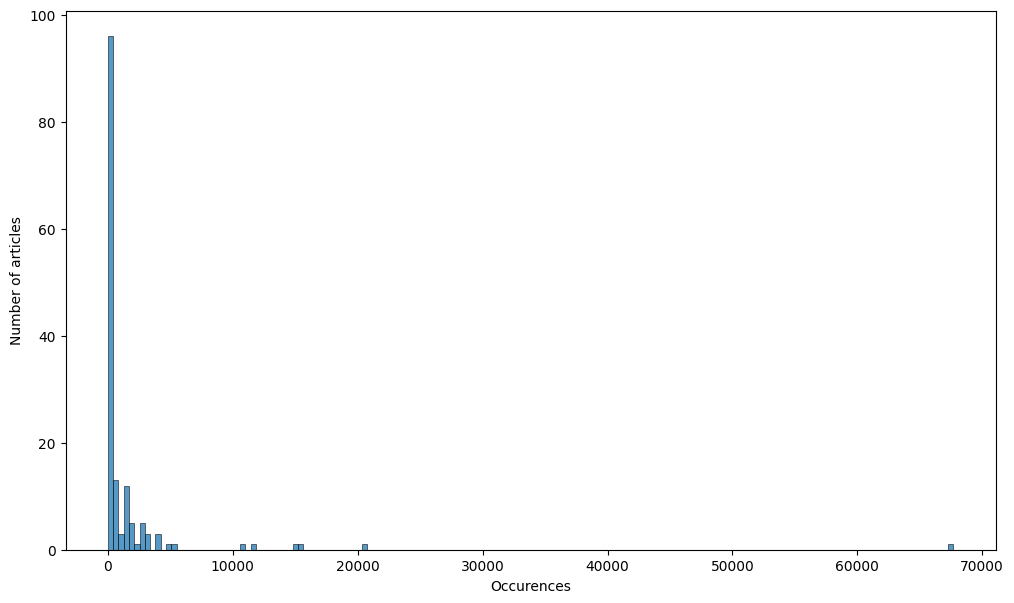

In [301]:
plt.figure(figsize=(12,7))
sns.histplot(count_article)
plt.xlabel('Occurences')
plt.ylabel('Number of articles')

Let's use the log scale for a better understanding

Text(0, 0.5, 'Number of articles')

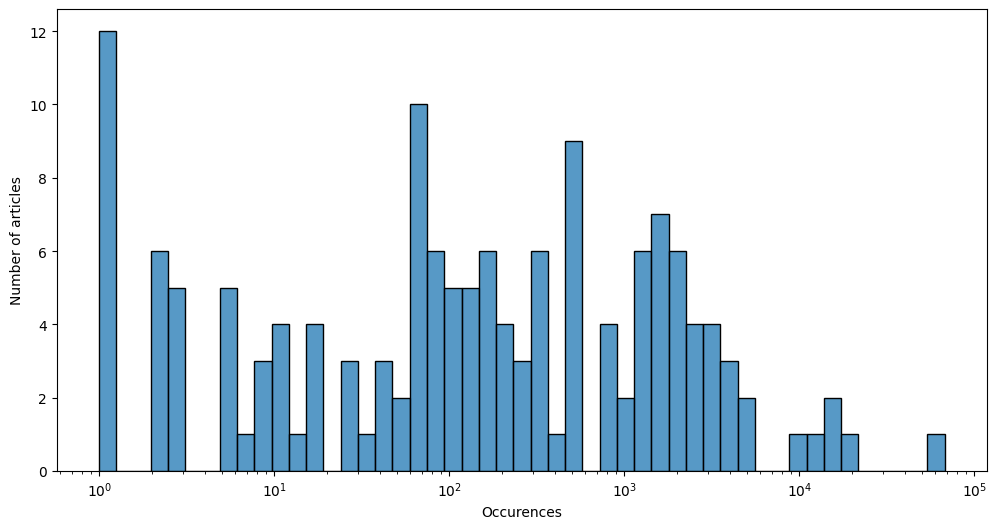

In [302]:
plt.figure(figsize=(12,6))
sns.histplot(count_article, log_scale=True, bins=49)
plt.xlabel('Occurences')
plt.ylabel('Number of articles')

### Unit_price column

In [303]:
df['unit_price'].value_counts()

unit_price
1.20     49080
0.15     20471
1.30     19778
1.25     18923
1.10     11933
         ...  
11.10        1
14.65        1
23.60        1
8.60         1
30.00        1
Name: count, Length: 123, dtype: int64

In [304]:
kmean = df[['article', 'unit_price']].groupby('article').mean().reset_index()
kmean = kmean.sort_values(by='unit_price')
kmean

,article,unit_price
0,.,0.000000
3,ARTICLE 295,0.000000
31,COUPE,0.150000
129,SUCETTE,0.300000
37,DEMI BAGUETTE,0.470367
...,...,...
116,ROYAL 6P,18.967742
132,TARTE FRAISE 6P,19.512000
19,BUCHE 6PERS,21.000000
20,BUCHE 8PERS,28.000000


In [311]:
kmean[kmean['unit_price']<1]

,article,unit_price
0,.,0.000000
3,ARTICLE 295,0.000000
31,COUPE,0.150000
129,SUCETTE,0.300000
37,DEMI BAGUETTE,0.470367
10,BOTTEREAU,0.500000
91,PAIN NOIR,0.600000
73,GRANDE SUCETTE,0.600000
49,FICELLE,0.627966
8,BANETTINE,0.631576


## Tickets DataFrame


The tickets DataFrame is grouped by the ticket_number and the date of the purchase.

In [305]:
df['total'] = df['unit_price'] * df['Quantity']

In [306]:
tickets = df[['ticket_number', 'article', 'total','Quantity', 'Date']].groupby(['ticket_number', 'Date']).agg({'article':'count', 'Quantity':'sum', 'total':'sum'}).reset_index()
tickets

,ticket_number,Date,article,Quantity,total
0,150040.0,2021-01-02 08:38:00,2,4.0,4.50
1,150041.0,2021-01-02 09:14:00,2,3.0,3.55
2,150042.0,2021-01-02 09:25:00,1,5.0,6.00
3,150043.0,2021-01-02 09:25:00,2,5.0,5.10
4,150044.0,2021-01-02 09:27:00,1,1.0,1.05
...,...,...,...,...,...
136446,288908.0,2022-09-30 18:34:00,1,2.0,2.70
136447,288910.0,2022-09-30 18:39:00,1,1.0,1.30
136448,288911.0,2022-09-30 18:52:00,5,11.0,12.15
136449,288912.0,2022-09-30 18:55:00,1,1.0,1.30


In [307]:
tickets.describe()

,ticket_number,Date,article,Quantity,total
count,136451.000000,136451,136451.000000,136451.000000,136451.000000
mean,219387.059105,2021-12-01 20:11:36.205964032,1.714938,2.670482,4.153817
min,150040.000000,2021-01-02 08:38:00,1.000000,1.000000,0.000000
25%,184671.500000,2021-07-03 09:28:30,1.000000,1.000000,1.300000
50%,219196.000000,2021-11-06 10:10:00,1.000000,2.000000,2.550000
75%,254164.500000,2022-06-01 10:39:30,2.000000,3.000000,5.125000
max,288913.000000,2022-09-30 18:56:00,13.000000,200.000000,200.000000
std,40089.239389,NaN,1.035836,2.426283,4.489642
